In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import scipy
import glob as gb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau , ModelCheckpoint
from keras.applications.mobilenet import MobileNet ,preprocess_input

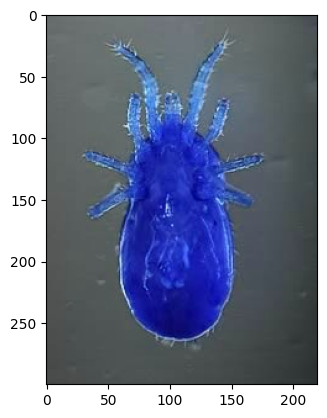

In [2]:
img=cv2.imread(r'D:\python\Source code\Dataset\pest\train\mites/jpg_1 - Copy (2).jpg')
plt.imshow(img)
plt.show()


In [3]:
img=np.array(img)
img.shape

(300, 220, 3)

In [4]:
train_dir=r'D:\python\Source code\Dataset\pest\train/'
test_dir=r'D:\python\Source code\Dataset\pest\test/'



training=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.05
).flow_from_directory(train_dir,batch_size=16,target_size=(224,224),subset="training")

validing=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.05
).flow_from_directory(train_dir,batch_size=16,target_size=(224,224),subset='validation',shuffle=True)

testing=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
).flow_from_directory(test_dir,batch_size=16,target_size=(224,224),shuffle=True)


Found 2565 images belonging to 9 classes.
Found 135 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [5]:
mobilenet=MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [6]:
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.99)

In [7]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_acc',verbose=2,factor=0.5,min_lr=0.00001)
callback=[EarlyStop , Reduce_LR]

In [8]:
mobilenet.trainable=False

In [9]:
model=Sequential([
    mobilenet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dense(9,activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1024)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                        

In [11]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])

In [12]:
history=model.fit(training,validation_data=validing,epochs=20,batch_size=16,
                  steps_per_epoch=len(training) // 16,validation_steps=len(validing) // 8,
                  callbacks=callback, verbose=2)

Epoch 1/20


10/10 - 26s - loss: 2.4231 - accuracy: 0.3313 - val_loss: 7.6621 - val_accuracy: 0.1250 - lr: 0.0010 - 26s/epoch - 3s/step
Epoch 2/20


10/10 - 12s - loss: 1.9334 - accuracy: 0.5101 - val_loss: 2.7866 - val_accuracy: 0.5000 - lr: 0.0010 - 12s/epoch - 1s/step
Epoch 3/20


10/10 - 14s - loss: 1.8695 - accuracy: 0.4812 - val_loss: 7.5429 - val_accuracy: 0.1250 - lr: 0.0010 - 14s/epoch - 1s/step
Epoch 4/20


10/10 - 12s - loss: 1.7220 - accuracy: 0.6125 - val_loss: 10.0520 - val_accuracy: 0.1875 - lr: 0.0010 - 12s/epoch - 1s/step
Epoch 5/20


10/10 - 13s - loss: 1.2489 - accuracy: 0.6812 - val_loss: 3.7708 - val_accuracy: 0.3125 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 6/20


10/10 - 13s - loss: 1.1548 - accuracy: 0.6562 - val_loss: 4.4409 - val_accuracy: 0.3750 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 7/20


10/10 - 13s - loss: 0.9382 - accuracy: 0.7375 - val_loss: 1.7859 - val_accuracy: 0.3750 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 8/20


10/10 - 12s - loss: 1.1000 - accuracy: 0.7047 - val_loss: 2.6293 - val_accuracy: 0.5000 - lr: 0.0010 - 12s/epoch - 1s/step
Epoch 9/20


10/10 - 12s - loss: 0.9999 - accuracy: 0.7312 - val_loss: 3.1921 - val_accuracy: 0.3125 - lr: 0.0010 - 12s/epoch - 1s/step
Epoch 10/20


10/10 - 13s - loss: 0.6965 - accuracy: 0.7812 - val_loss: 4.5812 - val_accuracy: 0.2500 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 11/20


10/10 - 13s - loss: 0.7380 - accuracy: 0.7688 - val_loss: 1.8717 - val_accuracy: 0.5000 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 12/20


10/10 - 12s - loss: 0.6726 - accuracy: 0.7852 - val_loss: 2.5324 - val_accuracy: 0.5000 - lr: 0.0010 - 12s/epoch - 1s/step
Epoch 13/20


10/10 - 13s - loss: 0.7039 - accuracy: 0.7937 - val_loss: 2.6108 - val_accuracy: 0.5000 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 14/20


10/10 - 13s - loss: 0.6470 - accuracy: 0.8625 - val_loss: 1.9309 - val_accuracy: 0.6250 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 15/20


10/10 - 13s - loss: 0.7474 - accuracy: 0.8438 - val_loss: 2.5115 - val_accuracy: 0.4375 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 16/20


10/10 - 13s - loss: 0.6510 - accuracy: 0.8062 - val_loss: 0.9904 - val_accuracy: 0.8125 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 17/20


10/10 - 12s - loss: 0.5018 - accuracy: 0.8375 - val_loss: 2.2411 - val_accuracy: 0.5000 - lr: 0.0010 - 12s/epoch - 1s/step
Epoch 18/20


10/10 - 12s - loss: 0.5440 - accuracy: 0.8250 - val_loss: 1.9605 - val_accuracy: 0.4375 - lr: 0.0010 - 12s/epoch - 1s/step
Epoch 19/20


10/10 - 13s - loss: 0.4519 - accuracy: 0.8562 - val_loss: 2.0382 - val_accuracy: 0.6250 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 20/20


10/10 - 13s - loss: 0.5866 - accuracy: 0.8000 - val_loss: 2.2209 - val_accuracy: 0.5000 - lr: 0.0010 - 13s/epoch - 1s/step


In [13]:
loss , acc = model.evaluate(testing)


29/29 [==============================] - 25s 842ms/step - loss: 1.2017 - accuracy: 0.6711


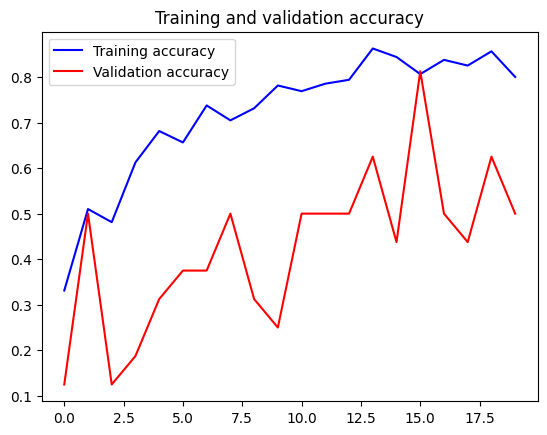

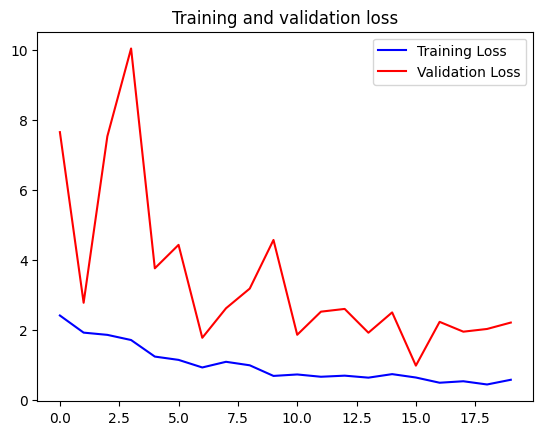

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()